In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir='SplitedDatset/train'
test_dir='SplitedDatset/test'
val_dir='SplitedDatset/val'

In [3]:
trian_generator = ImageDataGenerator().flow_from_directory(train_dir,target_size=(224,224),classes=['gates','jack','modi','musk','sushmita','trump'],batch_size=10)

Found 609 images belonging to 6 classes.


In [4]:
test_generator = ImageDataGenerator().flow_from_directory(test_dir,target_size=(224,224),classes=['gates','jack','modi','musk','sushmita','trump'],batch_size=10)

Found 81 images belonging to 6 classes.


In [5]:
valid_generator = ImageDataGenerator().flow_from_directory(val_dir,target_size=(224,224),classes=['gates','jack','modi','musk','sushmita','trump'],batch_size=4)

Found 74 images belonging to 6 classes.


In [6]:
def plot_img(ims,figsize=(12,6),rows=1,interp=False,titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)// rows if len(ims) % 2 ==0 else len(ims)//rows + 1
    for i in range (len(ims)):
        sp=f.add_subplot(rows,cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize =16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')    
            

In [7]:
imgs, labels = next(trian_generator)

/Users/sushmita/opt/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


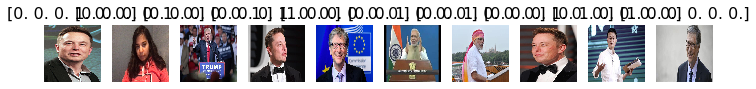

In [8]:
plot_img(imgs , titles=labels)

In [9]:
from tensorflow.keras import models,layers
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import Adam


In [10]:
model = models.Sequential()

In [11]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))





model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [13]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:

checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history = model.fit(trian_generator,steps_per_epoch=4,epochs=100,callbacks=checkpoint,validation_data=valid_generator,validation_steps=4)


Epoch 1/100
4/4 [==============================] - ETA: 0s - loss: 38.8899 - accuracy: 0.1250WARNING:tensorflow:From /Users/sushmita/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model/assets
4/4 [==============================] - 4s 1s/step - loss: 38.8899 - accuracy: 0.1250 - val_loss: 18.9350 - val_accuracy: 0.1250
Epoch 2/100
4/4 [==============================] - 4s 902ms/step - loss: 19.0967 - accuracy: 0.0250 - val_loss: 15.9255 - val_accuracy: 0.3125
Epoch 3/100
4/4 [==============================] - 4s 897ms/step - loss: 13.3525 - accu

Epoch 41/100
4/4 [==============================] - 1s 323ms/step - loss: 0.5826 - accuracy: 0.8000 - val_loss: 0.7980 - val_accuracy: 0.6875
Epoch 42/100
4/4 [==============================] - 1s 309ms/step - loss: 0.5000 - accuracy: 0.8000 - val_loss: 0.6776 - val_accuracy: 0.7500
Epoch 43/100
4/4 [==============================] - 1s 314ms/step - loss: 0.4352 - accuracy: 0.8500 - val_loss: 0.9988 - val_accuracy: 0.5625
Epoch 44/100
4/4 [==============================] - 1s 329ms/step - loss: 0.6078 - accuracy: 0.8000 - val_loss: 0.8981 - val_accuracy: 0.6875
Epoch 45/100
4/4 [==============================] - 3s 873ms/step - loss: 0.4716 - accuracy: 0.8750 - val_loss: 0.2961 - val_accuracy: 0.8750
Epoch 46/100
4/4 [==============================] - 1s 308ms/step - loss: 0.5049 - accuracy: 0.8250 - val_loss: 0.7179 - val_accuracy: 0.7500
Epoch 47/100
4/4 [==============================] - 1s 310ms/step - loss: 0.3982 - accuracy: 0.8500 - val_loss: 1.0057 - val_accuracy: 0.6875
Epoch 

In [ ]:
plt.figure(figsize=(20,7))

plt.plot(history.history['accuracy'],'r',label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')

plt.grid(True)
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(20,7))

plt.plot(history.history['loss'],'r',label='loss')
plt.plot(history.history['val_loss'],label='validation loss')

plt.grid(True)
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()